**Simple Linear Regression with Python**


Implement the Simple Linear Regression algorithm over the dataset given below 

Dataset: https://s3.us-west-2.amazonaws.com/public.gamelab.fun/dataset/salary_data.csv

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Importing Dataset**

In [2]:
dataf = pd.read_csv('/content/salary_data.csv')

**Printing first 5 rows of Dataset**

In [3]:
dataf.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


**Finding number of Rows and Columns**

In [4]:
dataf.shape

(30, 2)

**Checking missing values**

In [5]:
dataf.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

**Statistical Measures of the Dataset**

In [6]:
dataf.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


**Information of Dataset**

In [7]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


**Distribution Plot**

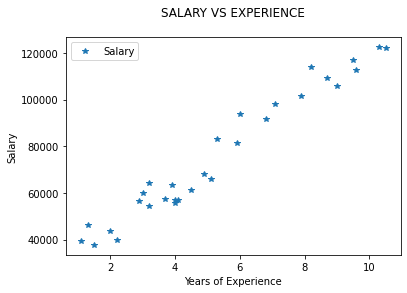

In [8]:
dataf.plot( x = 'YearsExperience', y = 'Salary', style = '*')
plt.title('SALARY VS EXPERIENCE\n')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

**Plotting the Regression Line**

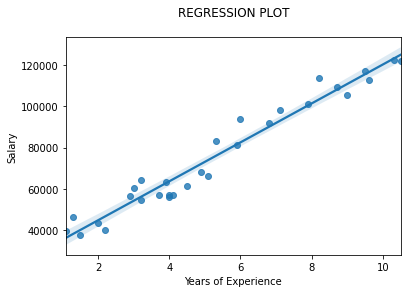

In [9]:
sns.regplot( x = dataf.YearsExperience, y = dataf.Salary)
plt.title('REGRESSION PLOT\n')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

**Spliting Dataset into Train and Test sets**

In [11]:
X = dataf.iloc[:, :-1].values
y = dataf.iloc[:, 1].values

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [13]:
X_train

array([[ 9.6],
       [ 4. ],
       [ 5.3],
       [ 7.9],
       [ 2.9],
       [ 5.1],
       [ 3.2],
       [ 4.5],
       [ 8.2],
       [ 6.8],
       [ 1.3],
       [10.5],
       [ 3. ],
       [ 2.2],
       [ 5.9],
       [ 6. ],
       [ 3.7],
       [ 3.2],
       [ 9. ],
       [ 2. ],
       [ 1.1],
       [ 7.1],
       [ 4.9],
       [ 4. ]])

In [14]:
X_test

array([[ 1.5],
       [10.3],
       [ 4.1],
       [ 3.9],
       [ 9.5],
       [ 8.7]])

In [15]:
y_train

array([112635,  55794,  83088, 101302,  56642,  66029,  64445,  61111,
       113812,  91738,  46205, 121872,  60150,  39891,  81363,  93940,
        57189,  54445, 105582,  43525,  39343,  98273,  67938,  56957])

In [16]:
y_test

array([ 37731, 122391,  57081,  63218, 116969, 109431])

**Training Dataset**

In [17]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
y_pred = regressor.predict(X_test)
y_pred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

In [19]:
y_test

array([ 37731, 122391,  57081,  63218, 116969, 109431])

In [20]:
y_pred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

**Actual and Predicted values**

In [21]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data

,Actual,Predicted
0,37731,40748.961841
1,122391,122699.622956
2,57081,64961.657170
3,63218,63099.142145
4,116969,115249.562855
5,109431,107799.502753


**Visualising Training Dataset Result**

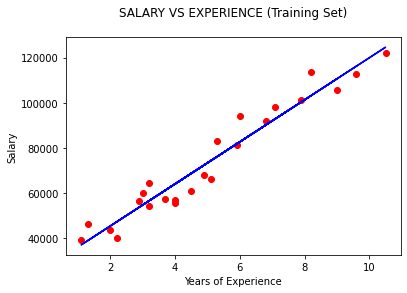

In [22]:
plt.title('SALARY VS EXPERIENCE (Training Set)\n')
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

**Visualising Test Dataset Result**

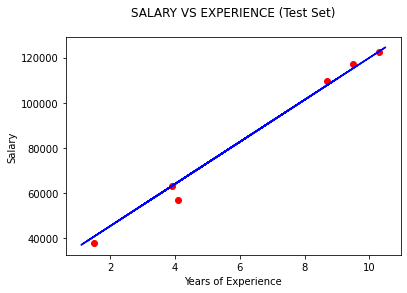

In [23]:
plt.title('SALARY VS EXPERIENCE (Test Set)\n')
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

**Checking Metrics**

In [24]:
from sklearn import metrics

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2 = metrics.r2_score(y_test, y_pred)

In [25]:
rmse

3580.979237321343

In [26]:
R2

0.988169515729126

**Model Testing**

In [32]:
result = regressor.predict([[3]])
print('Salary will be:', result)

Salary will be: [54717.82453082]


In [33]:
result = regressor.predict([[10]])
print('Salary will be:', result)

Salary will be: [119905.85041792]


Thank You!